# **Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error

import warnings 
warnings.filterwarnings('ignore')

# **EDA**

### **Read Data**

In [2]:
train_df = pd.read_csv('/kaggle/input/playground-series-s4e9/train.csv')
test_df = pd.read_csv('/kaggle/input/playground-series-s4e9/test.csv')

In [3]:
train_df.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            188533 non-null  int64 
 1   brand         188533 non-null  object
 2   model         188533 non-null  object
 3   model_year    188533 non-null  int64 
 4   milage        188533 non-null  int64 
 5   fuel_type     183450 non-null  object
 6   engine        188533 non-null  object
 7   transmission  188533 non-null  object
 8   ext_col       188533 non-null  object
 9   int_col       188533 non-null  object
 10  accident      186081 non-null  object
 11  clean_title   167114 non-null  object
 12  price         188533 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 18.7+ MB


In [5]:
train_df.describe()

,id,model_year,milage,price
count,188533.000000,188533.000000,188533.000000,1.885330e+05
mean,94266.000000,2015.829998,65705.295174,4.387802e+04
std,54424.933488,5.660967,49798.158076,7.881952e+04
min,0.000000,1974.000000,100.000000,2.000000e+03
25%,47133.000000,2013.000000,24115.000000,1.700000e+04
50%,94266.000000,2017.000000,57785.000000,3.082500e+04
75%,141399.000000,2020.000000,95400.000000,4.990000e+04
max,188532.000000,2024.000000,405000.000000,2.954083e+06


In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125690 entries, 0 to 125689
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            125690 non-null  int64 
 1   brand         125690 non-null  object
 2   model         125690 non-null  object
 3   model_year    125690 non-null  int64 
 4   milage        125690 non-null  int64 
 5   fuel_type     122307 non-null  object
 6   engine        125690 non-null  object
 7   transmission  125690 non-null  object
 8   ext_col       125690 non-null  object
 9   int_col       125690 non-null  object
 10  accident      124058 non-null  object
 11  clean_title   111451 non-null  object
dtypes: int64(3), object(9)
memory usage: 11.5+ MB


In [7]:
test_df.describe()

,id,model_year,milage
count,125690.000000,125690.000000,125690.000000
mean,251377.500000,2015.797526,66042.581510
std,36283.722005,5.673797,50223.858435
min,188533.000000,1974.000000,100.000000
25%,219955.250000,2013.000000,24500.000000
50%,251377.500000,2017.000000,57500.000000
75%,282799.750000,2020.000000,95798.000000
max,314222.000000,2024.000000,405000.000000


## **Data Preprocessing**

**Extract information from engine column**

In [8]:
train_df['engine']

0              172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel
1              252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel
2         320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...
3              420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel
4              208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel
                                ...                        
188528         420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel
188529        385.0HP 3.0L V6 Cylinder Engine Gasoline Fuel
188530         469.0HP 4.0L 8 Cylinder Engine Gasoline Fuel
188531                                                 3.0L
188532         252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel
Name: engine, Length: 188533, dtype: object

In [9]:
# 420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel
# Type of Feul
train_df['engine'].str.extract(r'Engine\s*(.*)').value_counts()

0                            
Gasoline Fuel                    136090
Flex Fuel Capability               5168
Diesel Fuel                        3691
Gasoline/Mild Electric Hybrid      3573
Gas/Electric Hybrid                1558
Plug-In Electric/Gas                537
                                      8
Name: count, dtype: int64

In [10]:
# # Extract values from the engine column in the training data
# train_df['horsepower'] = train_df['engine'].str.extract(r'(\d+\.\d+)HP').astype(float)
# train_df['engine_size'] = train_df['engine'].str.extract(r'(\d+\.\d+)L').astype(float)
# train_df['cylinders'] = train_df['engine'].str.extract(r'(\d+) Cylinder').astype(float)

# # Extract values from engine column in test data
# test_df['horsepower'] = test_df['engine'].str.extract(r'(\d+\.\d+)HP').astype(float)
# test_df['engine_size'] = test_df['engine'].str.extract(r'(\d+\.\d+)L').astype(float)
# test_df['cylinders'] = test_df['engine'].str.extract(r'(\d+) Cylinder').astype(float)

In [11]:
train_df

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,horsepower,engine_size,cylinders
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200,172.0,1.6,4.0
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999,252.0,3.9,8.0
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900,320.0,5.3,8.0
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000,420.0,5.0,8.0
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500,208.0,2.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188528,188528,Cadillac,Escalade ESV Platinum,2017,49000,Gasoline,420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,Beige,None reported,Yes,27500,420.0,6.2,8.0
188529,188529,Mercedes-Benz,AMG C 43 AMG C 43 4MATIC,2018,28600,Gasoline,385.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,White,Black,At least 1 accident or damage reported,Yes,30000,385.0,3.0,6.0
188530,188530,Mercedes-Benz,AMG GLC 63 Base 4MATIC,2021,13650,Gasoline,469.0HP 4.0L 8 Cylinder Engine Gasoline Fuel,7-Speed A/T,White,Black,None reported,Yes,86900,469.0,4.0,8.0
188531,188531,Audi,S5 3.0T Prestige,2022,13895,Gasoline,3.0L,1-Speed Automatic,Daytona Gray Pearl Effect,Black,None reported,NaN,84900,NaN,3.0,NaN


In [12]:
# Show some values after filtering
# print(train_df[['horsepower', 'engine_size', 'cylinders', 'fuel_type']].head())

   horsepower  engine_size  cylinders      fuel_type
0       172.0          1.6        4.0       Gasoline
1       252.0          3.9        8.0       Gasoline
2       320.0          5.3        8.0  E85 Flex Fuel
3       420.0          5.0        8.0       Gasoline
4       208.0          2.0        4.0       Gasoline


In [13]:
# Show some values after filtering
# print(test_df[['horsepower', 'engine_size', 'cylinders', 'fuel_type']].head())

   horsepower  engine_size  cylinders fuel_type
0       240.0          2.0        4.0  Gasoline
1       395.0          3.0        6.0    Hybrid
2         NaN          3.5        NaN  Gasoline
3         NaN          NaN        NaN  Gasoline
4       252.0          2.0        4.0  Gasoline


#### **Check Null Values**

In [11]:
train_df.isna().sum()

id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type        5083
engine              0
transmission        0
ext_col             0
int_col             0
accident         2452
clean_title     21419
price               0
dtype: int64

In [12]:
test_df.isna().sum()

id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type        3383
engine              0
transmission        0
ext_col             0
int_col             0
accident         1632
clean_title     14239
dtype: int64

#### **Fill missing Values in data**

In [13]:
# fillna for train data
train_df['fuel_type'].fillna(train_df['fuel_type'].mode()[0], inplace= True)
train_df['accident'].fillna(train_df['accident'].mode()[0], inplace= True)
train_df['clean_title'].fillna(train_df['clean_title'].mode()[0], inplace= True)

In [17]:
# # Fillna in train for col engine
# # Apply the same processing to the train data to fillna
# train_df['horsepower'].fillna(train_df['horsepower'].mean(), axis=0, inplace=True)
# train_df['engine_size'].fillna(train_df['engine_size'].mean(), axis=0, inplace=True)
# train_df['cylinders'].fillna(train_df['cylinders'].mode()[0], inplace=True)

In [14]:
train_df.isna().sum()

id              0
brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
price           0
dtype: int64

In [15]:
# fillna for test data
test_df['fuel_type'].fillna(test_df['fuel_type'].mode()[0], inplace= True)
test_df['accident'].fillna(test_df['accident'].mode()[0], inplace= True)
test_df['clean_title'].fillna(test_df['clean_title'].mode()[0], inplace= True)

In [20]:
# # Fillna in test for col engine
# # Apply the same processing to the test data to fillna
# test_df['fuel_type'].fillna(test_df['fuel_type'].mode()[0], inplace=True)
# test_df['horsepower'].fillna(train_df['horsepower'].mean(), inplace=True)
# test_df['engine_size'].fillna(train_df['engine_size'].mean(), inplace=True)
# test_df['cylinders'].fillna(train_df['cylinders'].mode()[0], inplace=True)

In [16]:
test_df.isna().sum()

id              0
brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
dtype: int64

**Drop Col engine from Data**

In [22]:
# # Drop col engine
# train_df.drop('engine', axis=1,inplace=True)
# test_df.drop('engine', axis=1,inplace=True)

In [17]:
train_df.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


**unique values in cat col**

In [17]:
train_df['brand'].unique()

array(['MINI', 'Lincoln', 'Chevrolet', 'Genesis', 'Mercedes-Benz', 'Audi',
       'Ford', 'BMW', 'Tesla', 'Cadillac', 'Land', 'GMC', 'Toyota',
       'Hyundai', 'Volvo', 'Volkswagen', 'Buick', 'Rivian', 'RAM',
       'Hummer', 'Alfa', 'INFINITI', 'Jeep', 'Porsche', 'McLaren',
       'Honda', 'Lexus', 'Dodge', 'Nissan', 'Jaguar', 'Acura', 'Kia',
       'Mitsubishi', 'Rolls-Royce', 'Maserati', 'Pontiac', 'Saturn',
       'Bentley', 'Mazda', 'Subaru', 'Ferrari', 'Aston', 'Lamborghini',
       'Chrysler', 'Lucid', 'Lotus', 'Scion', 'smart', 'Karma',
       'Plymouth', 'Suzuki', 'FIAT', 'Saab', 'Bugatti', 'Mercury',
       'Polestar', 'Maybach'], dtype=object)

In [18]:
train_df['model'].unique()

array(['Cooper S Base', 'LS V8', 'Silverado 2500 LT', ..., 'e-Golf SE',
       'Integra w/A-Spec Tech Package', 'IONIQ Plug-In Hybrid SEL'],
      dtype=object)

In [19]:
train_df['fuel_type'].unique()

array(['Gasoline', 'E85 Flex Fuel', 'Hybrid', 'Diesel', 'Plug-In Hybrid',
       '–', 'not supported'], dtype=object)

In [20]:
train_df['transmission'].unique()

array(['A/T', 'Transmission w/Dual Shift Mode', '7-Speed A/T',
       '8-Speed A/T', '10-Speed Automatic', '1-Speed A/T', '6-Speed A/T',
       '10-Speed A/T', '9-Speed A/T', '8-Speed Automatic',
       '9-Speed Automatic', '5-Speed A/T', 'Automatic',
       '7-Speed Automatic with Auto-Shift', 'CVT Transmission',
       '5-Speed M/T', 'M/T', '6-Speed M/T', '6-Speed Automatic',
       '4-Speed Automatic', '7-Speed M/T', '2-Speed A/T',
       '1-Speed Automatic', 'Automatic CVT', '4-Speed A/T',
       '6-Speed Manual', 'Transmission Overdrive Switch',
       '8-Speed Automatic with Auto-Shift', '7-Speed Manual',
       '7-Speed Automatic', '9-Speed Automatic with Auto-Shift',
       '6-Speed Automatic with Auto-Shift',
       '6-Speed Electronically Controlled Automatic with O', 'F', 'CVT-F',
       '8-Speed Manual', 'Manual', '–', '2', '6 Speed At/Mt',
       '5-Speed Automatic', '2-Speed Automatic', '8-SPEED A/T', '7-Speed',
       'Variable', 'Single-Speed Fixed Gear', '8-SPEED AT',


In [21]:
train_df['ext_col'].unique()

array(['Yellow', 'Silver', 'Blue', 'Black', 'White',
       'Snowflake White Pearl Metallic', 'Gray', 'Green',
       'Santorini Black Metallic', 'Purple', 'Ebony Twilight Metallic',
       'Red', 'Magnetite Black Metallic', 'Diamond Black', 'Vega Blue',
       'Beige', 'Gold', 'Platinum White Pearl', 'Metallic',
       'White Frost Tri-Coat', 'Firecracker Red Clearcoat',
       'Phytonic Blue Metallic', 'Blu', 'Orange', 'Brown',
       'Brilliant Silver Metallic', 'Black Raven', 'Black Clearcoat',
       'Firenze Red', 'Agate Black Metallic', 'Glacial White Pearl',
       'Majestic Plum Metallic', 'designo Diamond White Metallic',
       'Oxford White', 'Black Sapphire Metallic', 'Mythos Black',
       'Granite Crystal Clearcoat Metallic', 'White Diamond Tri-Coat',
       'Magnetite Gray Metallic', 'Carpathian Grey Premium Metallic',
       'designo Diamond White Bright',
       'Phantom Black Pearl Effect / Black Roof', 'Nebula Gray Pearl',
       'Deep Crystal Blue Mica', 'Flame Red

In [22]:
train_df['int_col'].unique()

array(['Gray', 'Beige', 'Black', '–', 'Blue', 'White', 'Red', 'Brown',
       'Dark Galvanized', 'Parchment.', 'Boulder', 'Orange',
       'Medium Earth Gray', 'Ebony', 'Canberra Beige', 'Jet Black',
       'Silver', 'Light Platinum / Jet Black', 'Macchiato/Magmagrey',
       'Gold', 'Cloud', 'Rioja Red', 'Global Black', 'Green',
       'Medium Stone', 'Navy Pier', 'Dark Ash', 'BLACK', 'Portland',
       'Sandstone', 'Canberra Beige/Black', 'Diesel Gray / Black',
       'Sarder Brown', 'Black Onyx', 'White / Brown', 'Black/Gun Metal',
       'Slate', 'Satin Black', 'Macchiato Beige/Black', 'Charcoal',
       'Black / Express Red', 'Cappuccino', 'Aragon Brown', 'Parchment',
       'Oyster W/Contrast', 'Adrenaline Red', 'Ebony.', 'Shara Beige',
       'Graystone', 'Pearl Beige', 'Nero Ade', 'Graphite',
       'Tan/Ebony/Ebony', 'Charcoal Black', 'Medium Ash Gray',
       'Ebony Black', 'Light Titanium', 'Sakhir Orange', 'Tan',
       'Rock Gray', 'Brandy', 'Carbon Black', 'Amber',
      

In [23]:
# Display some unique values for categorical properties
cat_col = ['brand', 'model', 'fuel_type', 'transmission', 'ext_col', 'int_col']

for col in cat_col:
    print(f'Unique values in {col} : ', train_df[col].unique())

Unique values in brand :  ['MINI' 'Lincoln' 'Chevrolet' 'Genesis' 'Mercedes-Benz' 'Audi' 'Ford'
 'BMW' 'Tesla' 'Cadillac' 'Land' 'GMC' 'Toyota' 'Hyundai' 'Volvo'
 'Volkswagen' 'Buick' 'Rivian' 'RAM' 'Hummer' 'Alfa' 'INFINITI' 'Jeep'
 'Porsche' 'McLaren' 'Honda' 'Lexus' 'Dodge' 'Nissan' 'Jaguar' 'Acura'
 'Kia' 'Mitsubishi' 'Rolls-Royce' 'Maserati' 'Pontiac' 'Saturn' 'Bentley'
 'Mazda' 'Subaru' 'Ferrari' 'Aston' 'Lamborghini' 'Chrysler' 'Lucid'
 'Lotus' 'Scion' 'smart' 'Karma' 'Plymouth' 'Suzuki' 'FIAT' 'Saab'
 'Bugatti' 'Mercury' 'Polestar' 'Maybach']
Unique values in model :  ['Cooper S Base' 'LS V8' 'Silverado 2500 LT' ... 'e-Golf SE'
 'Integra w/A-Spec Tech Package' 'IONIQ Plug-In Hybrid SEL']
Unique values in fuel_type :  ['Gasoline' 'E85 Flex Fuel' 'Hybrid' 'Diesel' 'Plug-In Hybrid' '–'
 'not supported']
Unique values in transmission :  ['A/T' 'Transmission w/Dual Shift Mode' '7-Speed A/T' '8-Speed A/T'
 '10-Speed Automatic' '1-Speed A/T' '6-Speed A/T' '10-Speed A/T'
 '9-Speed A/T'

#### **Encoding**

In [18]:
encoder = LabelEncoder()
label_encoders = {}      # Name of column encoded
cat_col = ['brand', 'model', 'fuel_type', 'engine', 'transmission', 'ext_col', 'int_col', 'accident', 'clean_title']

for col in cat_col:
    train_df[col] = encoder.fit_transform(train_df[col])
    test_df[col] = encoder.fit_transform(test_df[col])    
    label_encoders[col] = encoder

In [19]:
train_df

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,31,495,2007,213000,2,116,38,312,71,1,0,4200
1,1,28,930,2002,143250,2,366,38,263,10,0,0,4999
2,2,9,1575,2002,136731,1,640,38,38,71,1,0,13900
3,3,16,758,2017,19500,2,863,49,29,14,1,0,45000
4,4,36,1077,2021,7388,2,259,23,29,10,1,0,97500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188528,188528,8,604,2017,49000,2,866,49,304,10,1,0,27500
188529,188529,36,206,2018,28600,2,770,31,304,14,0,0,30000
188530,188530,36,223,2021,13650,2,921,23,304,14,1,0,86900
188531,188531,3,1471,2022,13895,2,512,1,82,14,1,0,84900


In [20]:
label_encoders

{'brand': LabelEncoder(),
 'model': LabelEncoder(),
 'fuel_type': LabelEncoder(),
 'engine': LabelEncoder(),
 'transmission': LabelEncoder(),
 'ext_col': LabelEncoder(),
 'int_col': LabelEncoder(),
 'accident': LabelEncoder(),
 'clean_title': LabelEncoder()}

#### **Spliting Data into features(X) & target (y)**

In [21]:
X = train_df.drop(['id', 'price'], axis=1)
y = train_df['price']

**Scaling**

In [22]:
# Create a StandardScaler object
scaler = MinMaxScaler()

# Make Scaler for train data
X = scaler.fit_transform(X)

In [23]:
# Make Scaler for test data
test_df.drop('id', axis=1, inplace=True)
test_df = scaler.fit_transform(test_df)

In [28]:
# # Create a StandardScaler object
# scaler = MinMaxScaler()

# # Determine which columns need scaling
# # num_col = ['model_year', 'milage', 'horsepower', 'engine_size', 'cylinders']
# tr_col = train_df.drop(['id', 'price'], axis=1)
# tst_col = test_df.drop('id', axis=1)
# # Apply scaling to the data
# train_df = scaler.fit_transform(tr_col)
# test_df = scaler.fit_transform(tst_col)

**Split data into train & test**

In [24]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=.2, random_state=42)

# **Model Structure**

## **Linear Regression**

In [25]:
lr = LinearRegression()

# Train the model
lr.fit(X_train, y_train)

# Predict values on the test set
y_pred = lr.predict(X_valid)

In [26]:
# Calculate R² Score
r2 = r2_score(y_valid, y_pred)
print(f'R² Score: {r2}')

# Calculate Mean Squared Error
mse = mean_squared_error(y_valid, y_pred)
print(f'Mean Squared Error: {mse}')

R² Score: 0.11129064515881149
Mean Squared Error: 4942233448.967894


## **Decision Tree Regressor**

In [27]:
dt = DecisionTreeRegressor()

# Train the model
dt.fit(X_train, y_train)

# Predict values on the test set
y_pred = dt.predict(X_valid)

In [28]:
# Calculate R² Score
r2 = r2_score(y_valid, y_pred)
print(f'R² Score: {r2}')

# Calculate Mean Squared Error
mse = mean_squared_error(y_valid, y_pred)
print(f'Mean Squared Error: {mse}')

R² Score: -1.4157090714566132
Mean Squared Error: 13434086308.297647


## **Random Forest Regressor**

In [29]:
rfr = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rfr.fit(X_train, y_train)

# Predict values on the test set
y_pred = rfr.predict(X_valid)

In [30]:
# Calculate R² Score
r2 = r2_score(y_valid, y_pred)
print(f'R² Score: {r2}')

# Calculate Mean Squared Error
mse = mean_squared_error(y_valid, y_pred)
print(f'Mean Squared Error: {mse}')

R² Score: -0.03010903832249867
Mean Squared Error: 5728576297.243283


## **Support Vector Regressor**

In [31]:
svr = SVR()

# Train the model
svr.fit(X_train, y_train)

# Predict values on the test set
y_pred = svr.predict(X_valid)

In [32]:
# Calculate R² Score
r2 = r2_score(y_valid, y_pred)
print(f'R² Score: {r2}')

# Calculate Mean Squared Error
mse = mean_squared_error(y_valid, y_pred)
print(f'Mean Squared Error: {mse}')

R² Score: -0.0036623563487108157
Mean Squared Error: 5581502706.138318


In [46]:
# Create Models
models = {
    'Linear Regression' : LinearRegression(),
    'Decision Tree Regressor' : DecisionTreeRegressor(),
    'Random Forest Regressor' : RandomForestRegressor(n_estimators=100, random_state=42),
    'Support Vector Regressor' : SVR() 
}

# Train and evaluate models
results = {}
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Calculate metrics
    r2 = r2_score(y_valid, y_pred)
    mse = mean_squared_error(y_valid, y_pred)
    
    # Store results
    results[name] = {'R² Score': r2, 'Mean Squared Error': mse}
    
# Show results
results_df = pd.DataFrame(results).T
print(results_df)

                          R² Score  Mean Squared Error
Linear Regression        -11.63841            0.008065
Decision Tree Regressor  -11.63841            0.008065
Random Forest Regressor  -11.63841            0.008065
Support Vector Regressor -11.63841            0.008065


### **ANN Model**

In [33]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam, Adamax

In [34]:
X_train.shape

(150826, 11)

In [35]:
# Building the model
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])

In [38]:
# Assemble the model
model.compile(Adamax(learning_rate=0.0001), loss = 'mean_squared_error')
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,905 (46.50 KB)

 Trainable params: 11,905 (46.50 KB)

 Non-trainable params: 0 (0.00 B)

In [39]:
history = model.fit(X_train, y_train, epochs=100, validation_split=.2)
history

Epoch 1/100
3771/3771 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 6564117504.0000 - val_loss: 7854785536.0000
Epoch 2/100
3771/3771 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 6563929088.0000 - val_loss: 7373575680.0000
Epoch 3/100
3771/3771 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 6452546560.0000 - val_loss: 7208348160.0000
Epoch 4/100
3771/3771 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 6238856192.0000 - val_loss: 7163426304.0000
Epoch 5/100
3771/3771 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 6096373760.0000 - val_loss: 7145848320.0000
Epoch 6/100
3771/3771 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 6090829824.0000 - val_loss: 7135328256.0000
Epoch 7/100
3771/3771 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 6126700544.0000 - val_loss: 7125559808.0000
Epoch 8/100
3771/3771 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 5717291008.0000 - val_loss: 7114817024.0000
Epoch 9/100
3771/3771 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 5166128640.0000 - val_loss: 7105019392.0000
Epoch 10/100
3771/3771 ━━━━━━━━━━━━━

In [40]:
tr_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = [i+1 for i in range(len(tr_loss))]

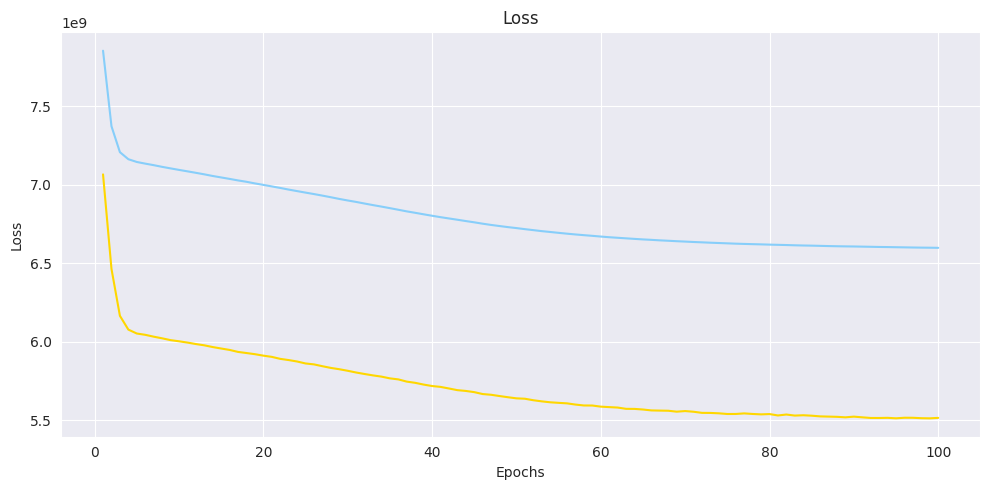

In [41]:
# Visualizing Training vs Validation Loss
plt.figure(figsize=(10,5))
plt.plot(epochs, tr_loss, 'gold', label = 'Train Loss')
plt.plot(epochs, val_loss, 'lightskyblue', label = 'Valid Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.tight_layout()
plt.show()

# **Making Predictions**

In [42]:
# Making predictions on 'test' data using the model, storing predictions as 'y_pred'
y_pred = model.predict(test_df)

3928/3928 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step


In [43]:
# Loading in Kaggle's sample submission file
submission = pd.read_csv('/kaggle/input/playground-series-s4e9/sample_submission.csv')

In [44]:
# Applying predicted 'price' values to 'submission'
submission['price'] = y_pred
submission.head()

,id,price
0,188533,16393.699219
1,188534,71006.632812
2,188535,57163.429688
3,188536,27853.972656
4,188537,37095.710938


In [45]:
# Exporting 'submission' as a .csv for scoring
submission.to_csv('submission.csv', index=False)